<a href="https://colab.research.google.com/github/oughtinc/ergo/blob/master/notebooks/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [3]:
!pip install --progress-bar off --quiet poetry
!pip install --progress-bar off --quiet git+https://github.com/oughtinc/ergo.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# Load questions

In [0]:
import ergo
import seaborn

Log into Metaculus:

In [0]:
metaculus = ergo.Metaculus(
    username="aehsani", 
    password="elephantpants"
)

Load some questions:

In [0]:
q_infections = metaculus.get_question(3529, name="Covid-19 infections in 2020")
q_ratio = metaculus.get_question(3755, name="Covid-19 ratio of fatalities to infections")

Build a model:

In [8]:
def model():
    infections = q_infections.sample_community()
    ratio = q_ratio.sample_community()
    deaths = infections * ratio
    ergo.tag(deaths, "Covid-19 deaths in 2020")

samples = ergo.run(model, num_samples=5000)

100%|██████████| 5000/5000 [00:05<00:00, 972.26it/s] 


Show samples:

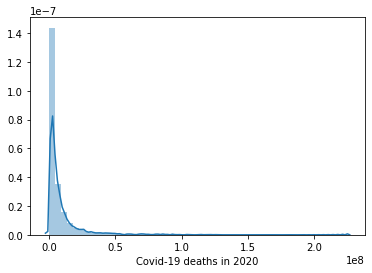

In [11]:
seaborn.distplot(samples["Covid-19 deaths in 2020"])